# Importing Kinematic modelling into GemPy using pynoddy

In [1]:
import sys, os
# Path to development gempy
sys.path.append('../../..')

# Path to development pynoddy
sys.path.append('../../../../pynoddy')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pn
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import gempy as gp
import pynoddy
import pynoddy.history
import pynoddy.output
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Making your favorite model in pynoddy
### Loading noddy model

In [2]:
#reload(pynoddy.history)
# Downloading a model
# his = pynoddy.history.NoddyHistory(url = \
#             "http://tectonique.net/asg/ch2/ch2_2/ch2_2_1/his/normal.his")
his = pynoddy.history.NoddyHistory('simple_model.his')
his.determine_model_stratigraphy()

In [3]:
# Choosing resolution
his.change_cube_size(200)

In [4]:
# Writing history file
history_name = "fold_thrust.his"
his.write_history(history_name)

In [5]:
# Computing history file
output = "fold_thrust_out"
pynoddy.compute_model(history_name, output, sim_type='BLOCK')

''

In [6]:
# load and visualise model
h_out = pynoddy.output.NoddyOutput(output)

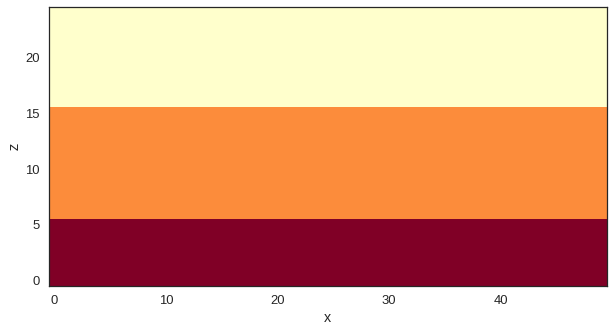

In [26]:
# his.determine_model_stratigraphy()
h_out.plot_section('y', position=,
                   layer_labels = his.model_stratigraphy, 
                   colorbar_orientation = 'horizontal', 
                   colorbar=False,
                   title = '',
#                   savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
                   cmap = 'YlOrRd')

In [9]:
a = gp.utils.find_interfaces_from_block(block, 2)

In [16]:
b = (block>2)[10, :, 1:] ^ (block>2)[10, :, :-1]

In [18]:
b = (block>2)[10, 1:, :] ^ (block>2)[10, -1:, :]

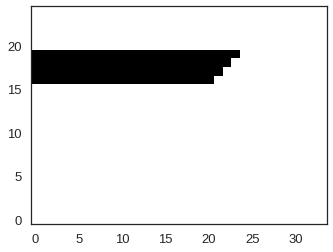

In [19]:
plt.imshow(b.T, origin='bottom')

In [11]:
np.array([0,1,1,0], dtype=bool) + np.array([0,1,1,0], dtype=bool)

array([False,  True,  True, False], dtype=bool)

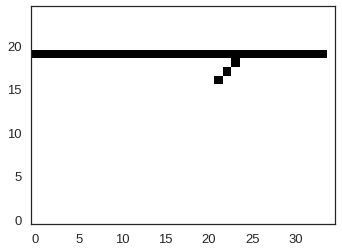

In [12]:
plt.imshow(a[10, :, :].T, origin='bottom')

In [15]:
resolution, noddy_grid.reshape(resolution)

ValueError: total size of new array must be unchanged

In [9]:
# Checkpoint. Saving noddy litholody block
np.save('noddy_block', h_out.block)

## GemPy finding interface points

In [8]:
# Creating geo_data with the same data extent and resolution as the noddy model

# initialize geo_data object
geo_data = gp.create_data([-14000, 44000, 
                           -14000, 44000, 
                           -10000, 3000],
                          resolution=[80, 80, 80])
block = np.load('noddy_block.npy')

In [20]:
# extent = [0, 30000.0,
#           0, 30000.0,
#           0, 3000.0  ]# h_out.extent_x, h_out.extent_y, h_out.extent_z
extent = [0, h_out.extent_x,
          0, h_out.extent_y,
          0, h_out.extent_z]
cs = 200 #h_out.delx

resolution = [int(extent[1]/cs), 
              int(extent[3]/cs), 
              int(extent[5]/cs)]

noddy_grid = gp.GridClass.create_regular_grid_3d(extent, resolution)

In [21]:
# Importing some points at the interface
gp.utils.set_interfaces_from_block(geo_data, block, noddy_grid, reset_index=True)

In [13]:
a = gp.utils.find_interfaces_from_block(block, 0)

In [13]:
np.unique(block)

array([ 1.,  2.])

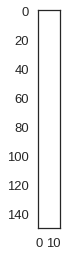

In [14]:
plt.imshow(a[:,20,:])

In [24]:
gp.plotting.plot_data_3D(geo_data)

closing vtk


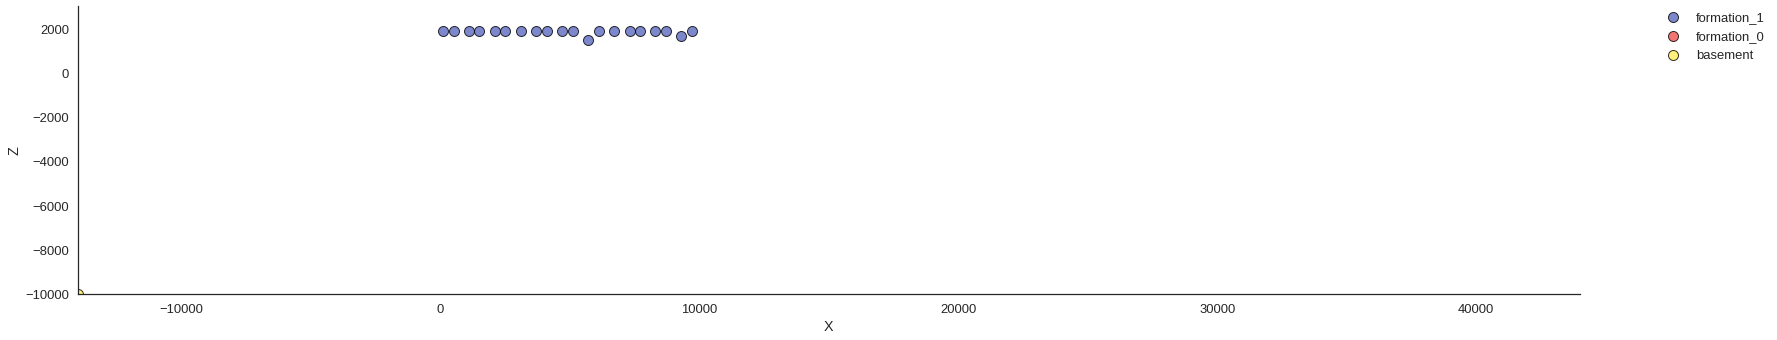

In [23]:
# Visualiziing
%matplotlib inline
gp.plotting.plot_data(geo_data, direction='y')

In [16]:
geo_data.interfaces.head()

,X,Y,Z,annotations,formation,formation_number,formation_value,isFault,order_series,series
0,26700.0,13500.0,648.571411,"${\bf{x}}_{\alpha \,{\bf{0}},0}$",formation_0,1,1,False,1,Default series
1,12500.0,14300.0,1925.714233,"${\bf{x}}_{\alpha \,{\bf{0}},18}$",formation_0,1,1,False,1,Default series
2,100.0,13300.0,10.000000,"${\bf{x}}_{\alpha \,{\bf{0}},17}$",formation_0,1,1,False,1,Default series
3,1500.0,14500.0,2351.428467,"${\bf{x}}_{\alpha \,{\bf{0}},16}$",formation_0,1,1,False,1,Default series
4,3100.0,14300.0,1925.714233,"${\bf{x}}_{\alpha \,{\bf{0}},15}$",formation_0,1,1,False,1,Default series


In [17]:
geo_data.extent

array([-14000,  44000, -14000,  44000, -10000,   3000])

In [18]:
# Setting orientation from interfaces
gp.set_orientation_from_interfaces(geo_data, [5,6,7,8,9,])

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,11620.0,13860.0,1116.857141,-0.001805,-0.884081,0.46733,62.138875,180.116963,1.0,formation_0,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1


In [19]:
gp.plotting.plot_data_3D(geo_data)

closing vtk


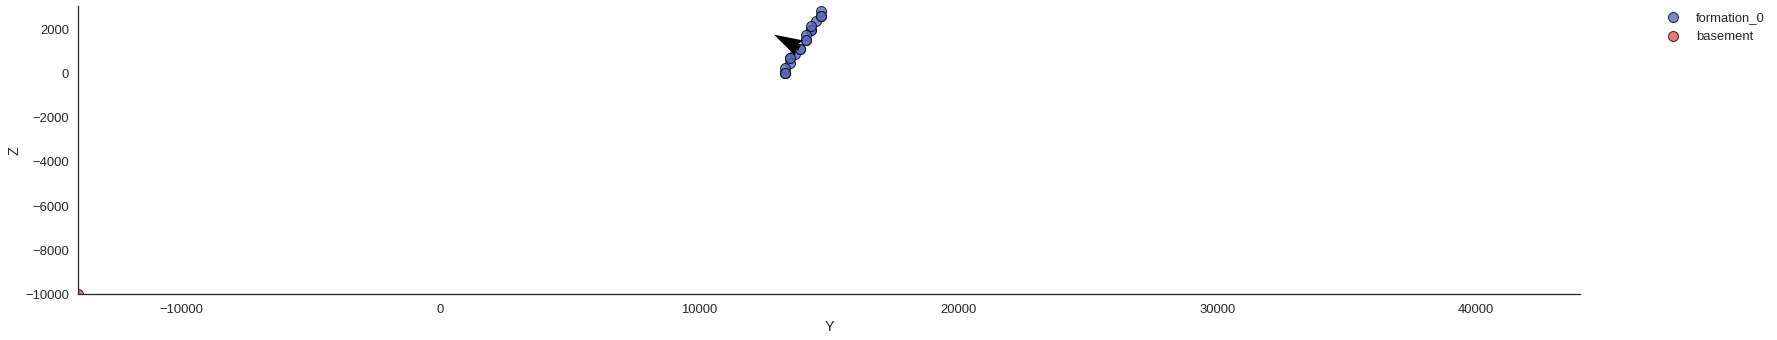

In [20]:
gp.plotting.plot_data(geo_data, direction='x')

### Computing and visualizing gempy model

In [19]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [20]:
lith, fault = gp.compute_model(interp_data)

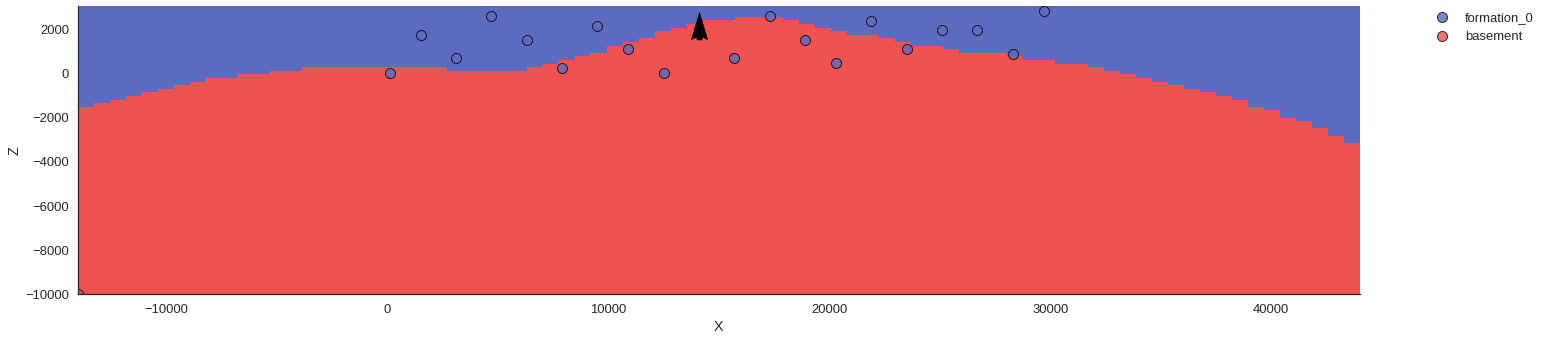

In [22]:
%matplotlib inline
gp.plotting.plot_section(geo_data, lith[0], 25, direction='y', plot_data= True)

In [21]:
ver, sim = gp.get_surfaces(interp_data, lith[1], None)
#gp.plotting.plot_surfaces_3D_real_time(geo_data, interp_data, ver, sim)

## Comparing physics
### pynoddy gravity

Density is 2.5 and 3.5

In [22]:
pynoddy.compute_model(history_name, output, sim_type = 'GEOPHYSICS')

''

In [23]:
geophys1 = pynoddy.output.NoddyGeophysics(output)

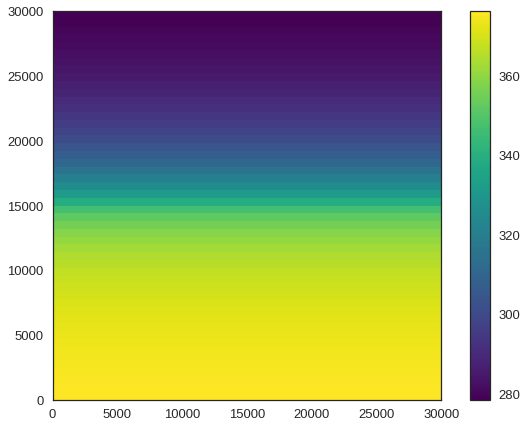

In [24]:
import matplotlib.pyplot as plt

plt.imshow(geophys1.grv_data, cmap='viridis', origin='lower',
           extent=extent[:-2] )
plt.colorbar()

### GemPy Gravity

In [25]:
gp.get_data(geo_data, 'formations')

,value,formation_number
formation_0,1,1
basement,2,2


In [26]:
gp.set_formations(geo_data, formations_values=[2.5, 3.5])

,value,formation_number
formation_0,2.5,1
basement,3.5,2


In [27]:
interp_data_grav = gp.InterpolatorData(geo_data, output='gravity',
                                       compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [28]:
gp.set_geophysics_obj(interp_data_grav,
                      extent,
                      [50, 50])


In [29]:
gp.precomputations_gravity(interp_data_grav, 20);

In [30]:
geo_data.resolution

array([80, 80, 80])

In [31]:


x_g = geo_data.grid.values[:,0].reshape(geo_data.resolution)[40:,:,:]
y_g = geo_data.grid.values[:,1].reshape(geo_data.resolution)[40:,:,:]
z_g = geo_data.grid.values[:,2].reshape(geo_data.resolution)[40:,:,:]

In [ ]:
import vtkInterface
import numpy as np
#[7.050000e+05,747000,6863000,6925000,-20000, 200

# Lith block grid
grid = vtkInterface.StructuredGrid(
x_g, y_g, z_g
                               )
# Fixing lith block direction
e = lith[0].reshape(geo_data.resolution)[40:,:,:]
g = e.swapaxes(0,2)

# Gravity  mesh

#.reshape(20,30), cmap='viridis', origin='lower', alpha=0.8, extent=[0,20e3,0,10e3]
# x_v = np.linspace(0, 20e3, 30)
# y_v = np.linspace(0, 10e3, 20)
# z_v = 1500
# x, y, z = np.meshgrid(x_v, y_v, z_v)

# a = vtkInterface.StructuredGrid(x,y, z)

In [34]:
import copy

col = copy.deepcopy(gp.plotting.colors.cmap)
plobj = vtkInterface.PlotClass()
plobj.AddMesh(grid, scalars= g,
              showedges=True,
              interpolatebeforemap=False, colormap=col,
              lighting=False)

(vtkRenderingOpenGL2Python.vtkOpenGLActor)0x7f652b662048

In [35]:
plobj.Plot()

[(79322.6232066679, -44020.35139848742, 48772.12582447568),
 (33400.0, 15000.0, -1000.0),
 (0.2744901081295989, 0.7357221234590579, 0.6191672937033222)]

In [38]:
interp_data_grav.update_interpolator(geo_data)

In [39]:
interp_data_grav.geophy.range_max

0.093580901856763918

In [40]:
interp_data_grav.geo_data_res.extent[5]-interp_data_grav.geo_data_res.extent[4]

0.1061007957559682

In [41]:
interp_data_grav.geo_data_res.extent

array([ 0.2501    ,  0.86017958,  0.3495695 ,  0.95964907,  0.44852743,
        0.55462823])

In [42]:
interp_data_grav.interpolator.tg.tz.get_value()[0].sum()

2.2891245

In [35]:
lith2, fault, grav = gp.compute_model(interp_data_grav, 'gravity')

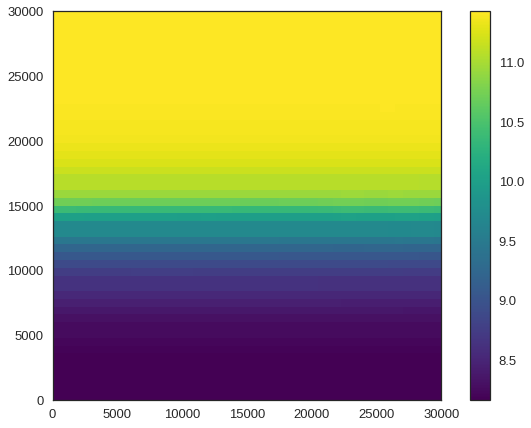

In [36]:
import matplotlib.pyplot as plt

plt.imshow(grav.reshape(50, 50), cmap='viridis', origin='lower',
           extent=extent[:-2] )
plt.colorbar()

### Comparing gravities

We set gempy values to to noddys

In [37]:
G = grav.reshape(50, 50)
N = geophys1.grv_data

# rs_min, rs_max = np.min(grav_real['G']), np.max(grav_real['G'])
# rs_range = rs_max - rs_min
# rs_mid = 0.5*(rs_max+rs_min)

# Calibration parameters
G_min, G_max =  np.min(G), np.max(G)   #36.630742, 36.651496    #30.159309, 30.174104#
N_min, N_max = np.min(N), np.max(N)

# Average
G_mid = 0.5 * (G_max + G_min)
N_mid = 0.5 * (N_max + N_min)

# Shifting
G_range = G_max - G_min
N_range = N_max - N_min
 

# Rescaling
Reescaled_G = N_mid + (G - G_mid) / G_range * N_range

# e_sq = T.sqrt(T.sum(T.square(Reescaled_G - (grav_real_th))))

(376.189, 376.18897500000003, 278.55209, 278.55208800000003)

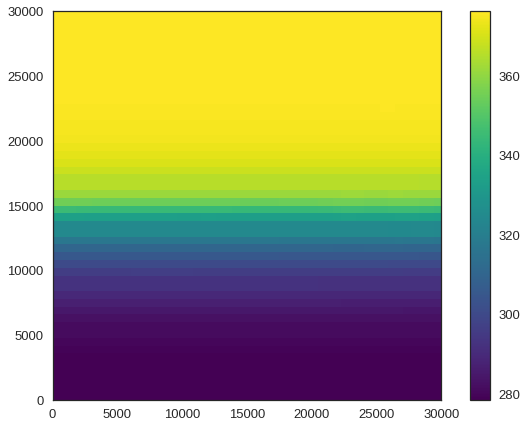

In [38]:
import matplotlib.pyplot as plt

plt.imshow(Reescaled_G.reshape(50, 50), cmap='viridis', origin='lower',
           extent=extent[:-2] )
plt.colorbar()
Reescaled_G.max(), N.max(), Reescaled_G.min(), N.min()

In [39]:
(N[::-1, :] - Reescaled_G ). max()

6.3016735332031431

### Dif plot

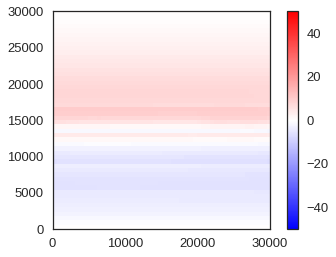

In [40]:
%matplotlib inline
plt.imshow(Reescaled_G - N[::-1, :], cmap='bwr', origin='R',
           extent=extent[:-2], vmin=-50, vmax=50)
plt.colorbar()

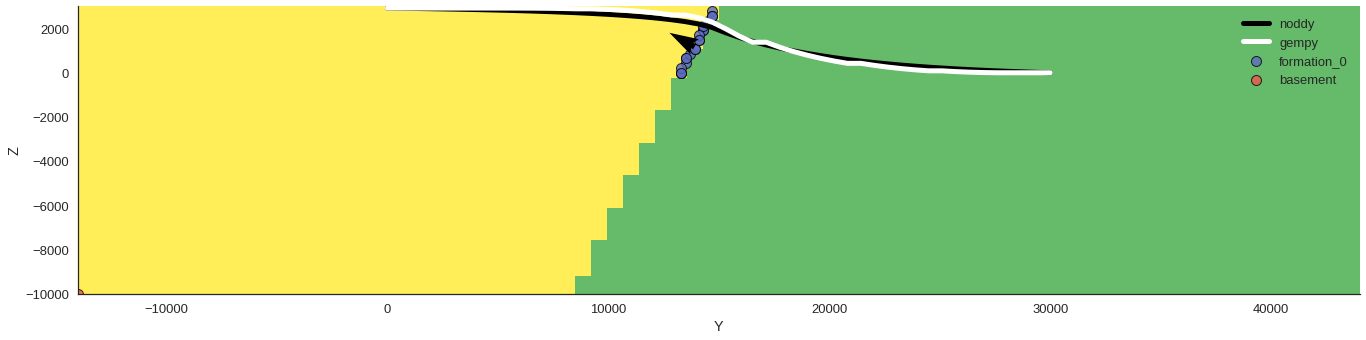

In [41]:
# # his.determine_model_stratigraphy()
# h_out.plot_section('x', 
#                    layer_labels = his.model_stratigraphy, 
#                    colorbar_orientation = 'horizontal', 
#                    colorbar=False,
#                    title = '',
# #                   savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
#                    cmap = 'YlOrRd')

gp.plotting.plot_section(geo_data, lith2[0], 30, direction='x', plot_data= True)
plt.plot(np.linspace(0,30000, 50),
         (geophys1.grv_data[:,25] - geophys1.grv_data[:,0].min()) * 30, linewidth = 5, label = 'noddy', c='black')
plt.plot(np.linspace(0,30000, 50),
          (Reescaled_G[::-1, 0] - Reescaled_G[:, 25].min()) * 30,  linewidth = 5, label = 'gempy', c = 'white')
plt.legend()

In [ ]:
gp.plotting.plot_section(geo_data, lith2[0], 30, direction='x', plot_data= True)
plt.plot(np.linspace(0,30000, 50),
         (geophys1.grv_data[:,25] - geophys1.grv_data[:,0].min()) * 30, linewidth = 5, label = 'noddy', c='black')
plt.plot(np.linspace(0,30000, 50),
          (Reescaled_G[::-1, 0] - Reescaled_G[:, 25].min()) * 30,  linewidth = 5, label = 'gempy', c = 'white')
plt.legend()

In [102]:
interp_data_grav.interpolator.tg.tz.get_value().max()

0.012881384

In [103]:
interp_data_grav.interpolator.tg.tz.get_value().min()

1.5439915e-06

In [104]:
interp_data_grav.interpolator.tg.tz.get_value().mean()

0.00010306903

In [118]:
np.arange(-4,-2)

array([-4, -3])

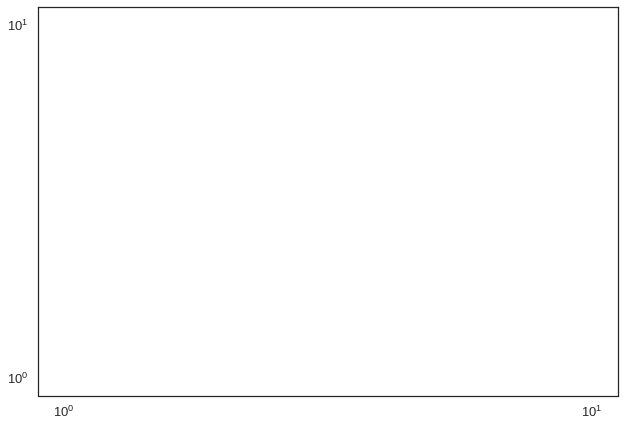

In [117]:
plt.hist(interp_data_grav.interpolator.tg.tz.get_value()[1000], log=False,
         bins= 10**(np.arange(-4,-2)))
plt.xscale('log')
plt.yscale('log', nonposy='clip')


In [42]:
dev = 10
a = interp_data_grav.interpolator.tg.tz.get_value()[dev]
#a.sort()

In [43]:
b = interp_data_grav.interpolator.tg.select.get_value()

In [44]:
c=b.reshape(2500, -1)[dev]

In [45]:
c = c.astype(bool)

In [46]:
d = interp_data_grav.geo_data_res.grid.values[c]

In [47]:
d

array([[ -4937.5 ,  -3487.5 ,   1781.25],
       [ -4937.5 ,  -3487.5 ,   1943.75],
       [ -4937.5 ,  -3487.5 ,   2106.25],
       ..., 
       [ 16812.5 ,   3762.5 ,   2593.75],
       [ 16812.5 ,   3762.5 ,   2756.25],
       [ 16812.5 ,   3762.5 ,   2918.75]], dtype=float32)

In [48]:
a.shape, d.shape

((37347,), (37347, 3))

In [49]:
d[11187]

array([ 3037.5 , -7112.5 ,  2756.25], dtype=float32)

In [50]:
np.unique(d[:,1])

array([-10737.5, -10012.5,  -9287.5,  -8562.5,  -7837.5,  -7112.5,
        -6387.5,  -5662.5,  -4937.5,  -4212.5,  -3487.5,  -2762.5,
        -2037.5,  -1312.5,   -587.5,    137.5,    862.5,   1587.5,
         2312.5,   3037.5,   3762.5,   4487.5,   5212.5,   5937.5,
         6662.5,   7387.5,   8112.5,   8837.5,   9562.5,  10287.5,  11012.5], dtype=float32)

In [52]:
slicing = np.array(d[:,1]> 0) * np.array( d[:,1]<340)

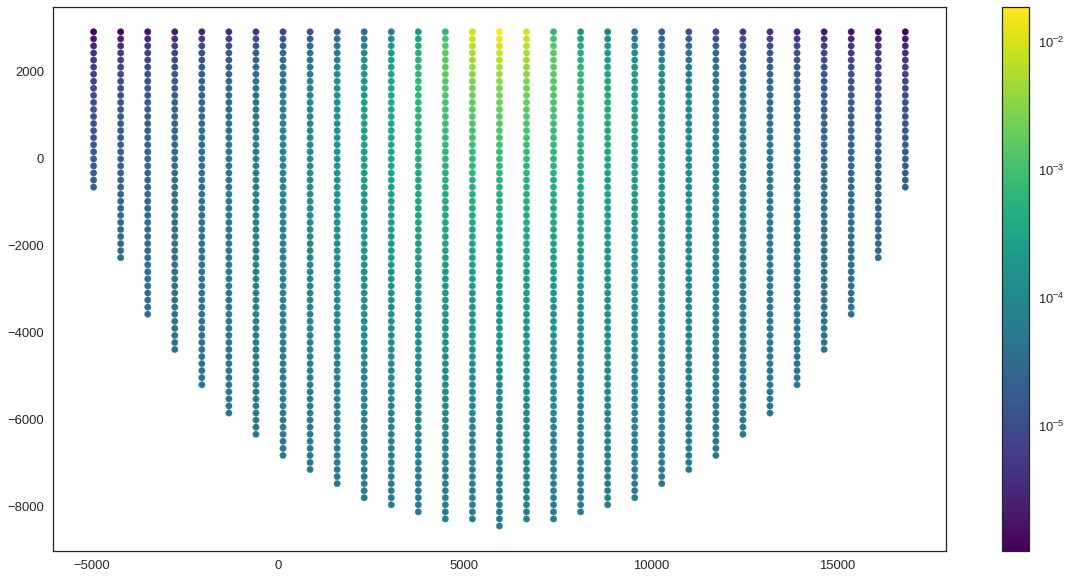

In [53]:
import matplotlib
plt.figure(figsize=(20,10))
val = 100000
plt.scatter(d[slicing,0], d[slicing,2], s=40, c=a[slicing],
            cmap='viridis', norm=matplotlib.colors.LogNorm(), alpha= 1)

# plt.scatter(d[high,1], d[high,2], s=50, c=a[high],
#             cmap='viridis', norm=matplotlib.colors.LogNorm())

plt.colorbar()

In [ ]:
high = a>1e-4

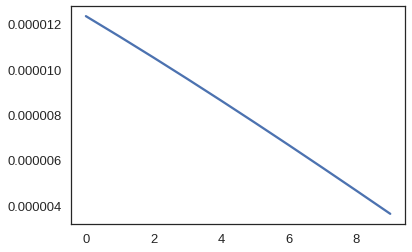

In [205]:
plt.plot(a[:10])

In [233]:
a.argmax()

11187

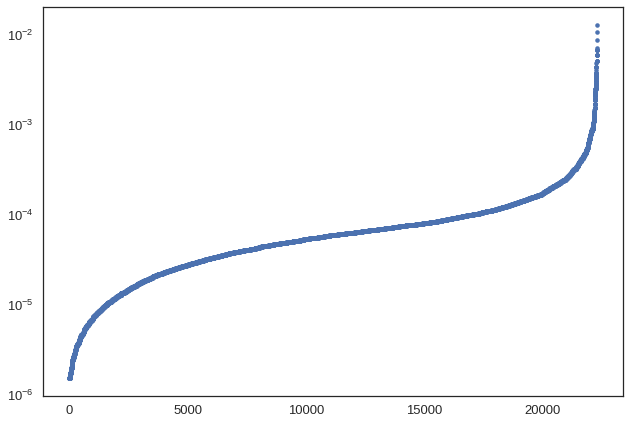

In [123]:
plt.plot(a, '.')
plt.yscale('log', nonposy='clip')


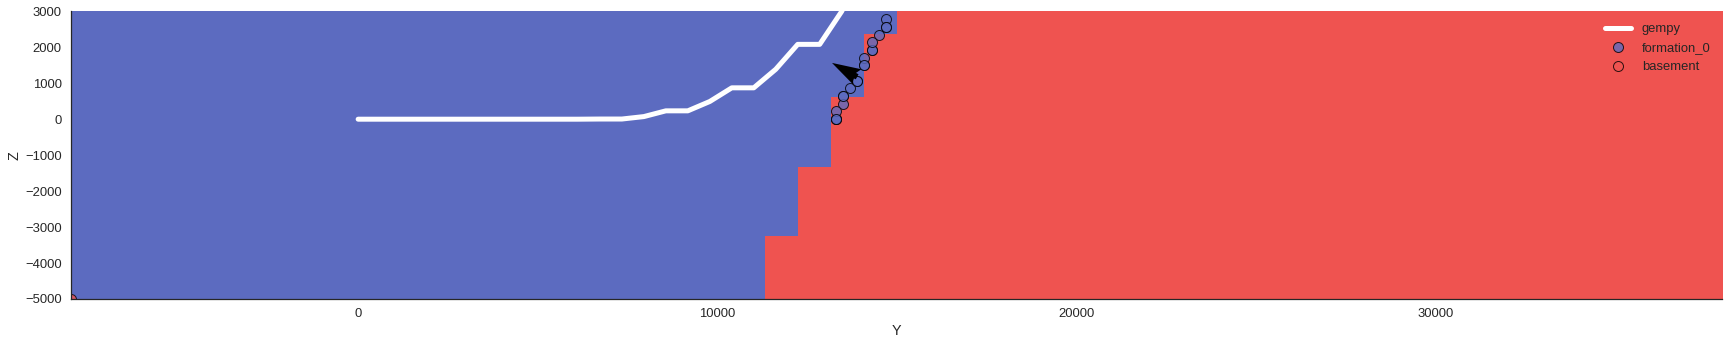

In [50]:
gp.plotting.plot_section(geo_data, lith[0], 30, direction='x', plot_data= True)

plt.plot(np.linspace(0,30000, 50),
          (grav.reshape(50, 50)[:, 25] - grav.reshape(50, 50)[:, 25].min()) * 3000,  linewidth = 5, label = 'gempy', c = 'white')
plt.legend()


<IPython.core.display.Javascript object>


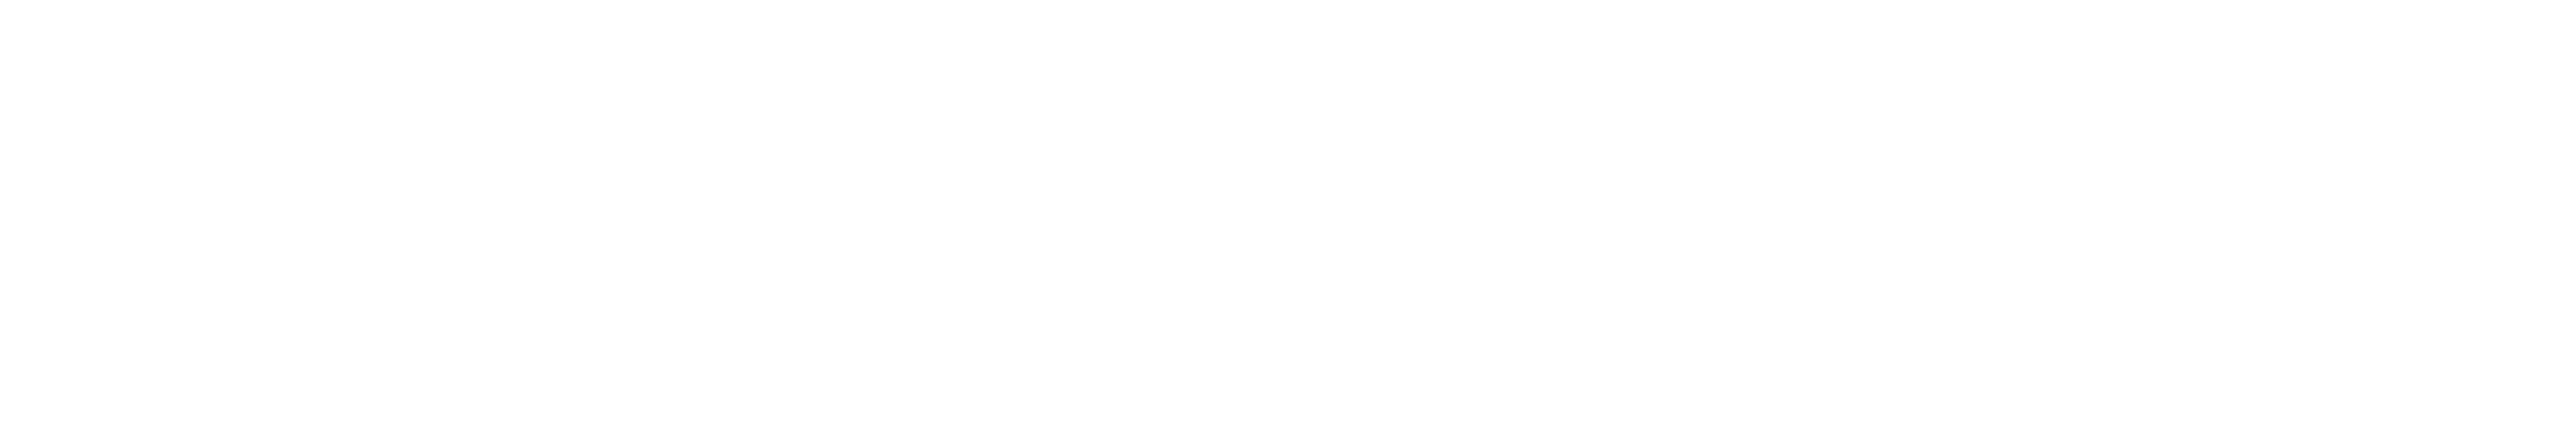

<IPython.core.display.Javascript object>


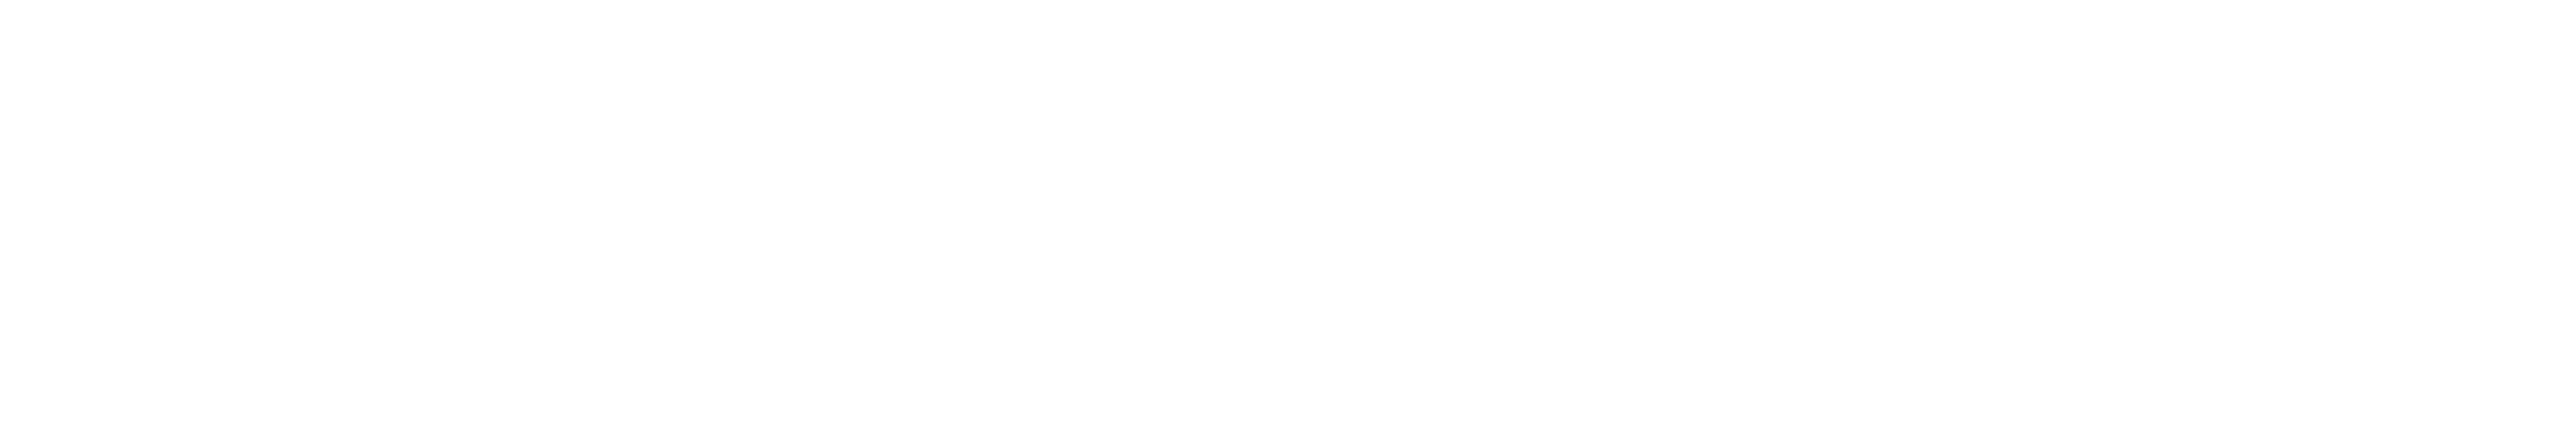

In [51]:
%matplotlib notebook
gp.plotting.plot_section(geo_data, lith2[0], 30, direction='x', plot_data= True)


<IPython.core.display.Javascript object>


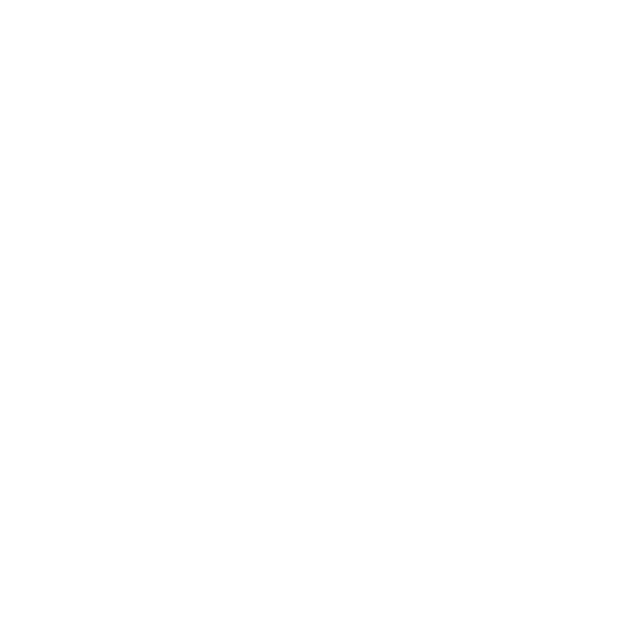

<IPython.core.display.Javascript object>


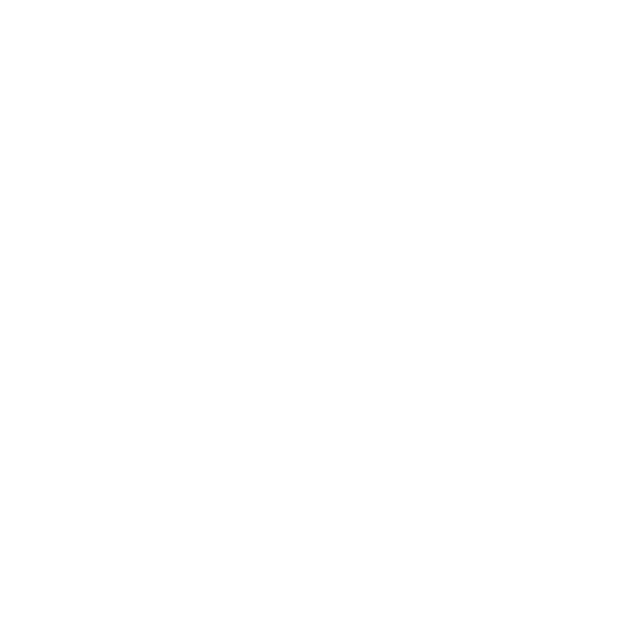

In [52]:
gp.plotting.plot_section(geo_data, lith2[0], 0, direction='z', plot_data= True)


<IPython.core.display.Javascript object>


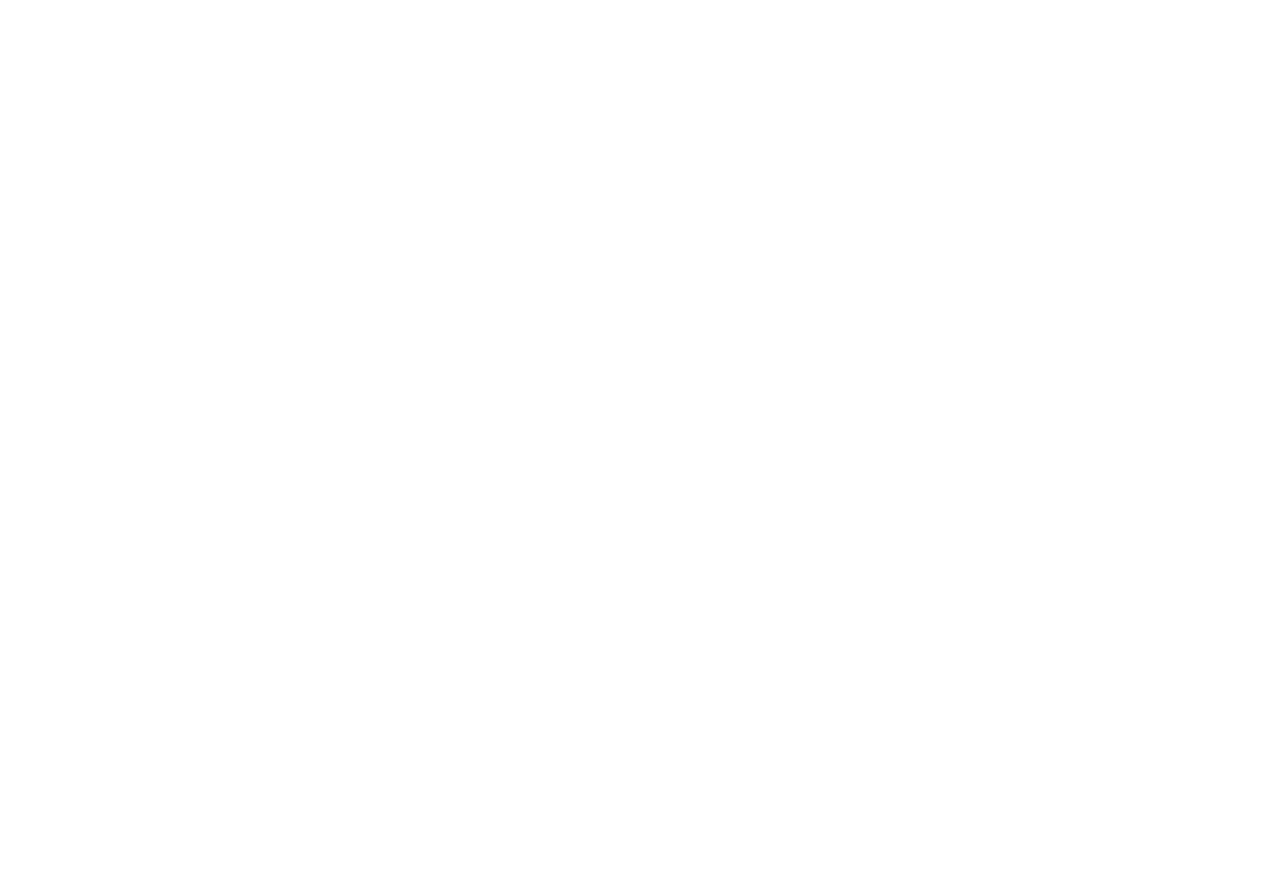

[]

<IPython.core.display.Javascript object>


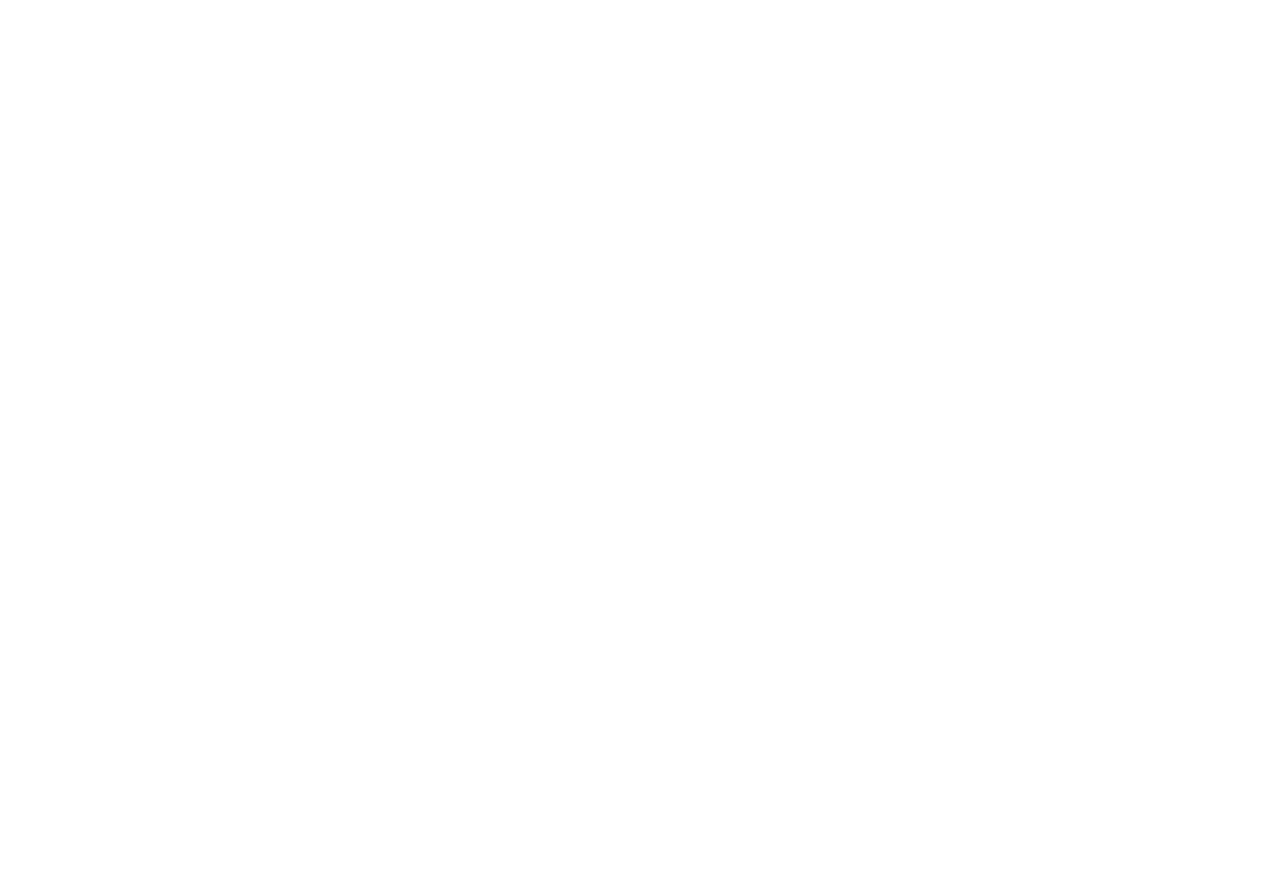

In [53]:
plt.plot()

In [54]:
plt.plot(geophys.grv_data[:,0])
plt.plot(geophys2.grv_data[:,0])
plt.plot(geophys3.grv_data[:,0])
plt.plot(grav.reshape(50,50)[:,0])

NameError: name 'geophys' is not defined

In [ ]:
plt.plot(grav.reshape(50,50)[:,0])

In [ ]:
interp_data_grav.geo_data_res.interfaces